In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None 
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.sparse import hstack,csr_matrix
from sklearn.linear_model import RidgeCV
import os
import matplotlib.pyplot as plt

In [2]:
# I need to merge all season pbp again so I can merge xG values on the shots.

In [3]:
file_path = r'C:\Users\jorda\Documents\Concordia Boot Camp\NHL raw data\PBP'

file_list = os.listdir(file_path)
File_list_final=[]
for i in file_list:
    File_list_final.append(f'{file_path}\{i}') # Making a list of the files I need to extract+ transform then append to final DF.
File_list_final

['C:\\Users\\jorda\\Documents\\Concordia Boot Camp\\NHL raw data\\PBP\\nhl_pbp_20132014.csv',
 'C:\\Users\\jorda\\Documents\\Concordia Boot Camp\\NHL raw data\\PBP\\nhl_pbp_20142015.csv',
 'C:\\Users\\jorda\\Documents\\Concordia Boot Camp\\NHL raw data\\PBP\\nhl_pbp_20152016.csv',
 'C:\\Users\\jorda\\Documents\\Concordia Boot Camp\\NHL raw data\\PBP\\nhl_pbp_20162017.csv',
 'C:\\Users\\jorda\\Documents\\Concordia Boot Camp\\NHL raw data\\PBP\\nhl_pbp_20172018.csv',
 'C:\\Users\\jorda\\Documents\\Concordia Boot Camp\\NHL raw data\\PBP\\nhl_pbp_20182019.csv',
 'C:\\Users\\jorda\\Documents\\Concordia Boot Camp\\NHL raw data\\PBP\\nhl_pbp_20192020.csv',
 'C:\\Users\\jorda\\Documents\\Concordia Boot Camp\\NHL raw data\\PBP\\nhl_pbp_20202021.csv',
 'C:\\Users\\jorda\\Documents\\Concordia Boot Camp\\NHL raw data\\PBP\\nhl_pbp_20212022.csv',
 'C:\\Users\\jorda\\Documents\\Concordia Boot Camp\\NHL raw data\\PBP\\nhl_pbp_20222023.csv']

In [1]:
# Much like the xG model data setup notebook, I have many cells here to test each segment of the code, but do have everything as a function later on in the notebook. All comments will be in the cell with the function.

In [5]:
print(File_list_final[0])
print(File_list_final[1])
print(File_list_final[2])
print(File_list_final[3])
print(File_list_final[4])
print(File_list_final[5])
print(File_list_final[6])
print(File_list_final[7])
print(File_list_final[8])
print(File_list_final[9])

C:\Users\jorda\Documents\Concordia Boot Camp\NHL raw data\PBP\nhl_pbp_20132014.csv
C:\Users\jorda\Documents\Concordia Boot Camp\NHL raw data\PBP\nhl_pbp_20142015.csv
C:\Users\jorda\Documents\Concordia Boot Camp\NHL raw data\PBP\nhl_pbp_20152016.csv
C:\Users\jorda\Documents\Concordia Boot Camp\NHL raw data\PBP\nhl_pbp_20162017.csv
C:\Users\jorda\Documents\Concordia Boot Camp\NHL raw data\PBP\nhl_pbp_20172018.csv
C:\Users\jorda\Documents\Concordia Boot Camp\NHL raw data\PBP\nhl_pbp_20182019.csv
C:\Users\jorda\Documents\Concordia Boot Camp\NHL raw data\PBP\nhl_pbp_20192020.csv
C:\Users\jorda\Documents\Concordia Boot Camp\NHL raw data\PBP\nhl_pbp_20202021.csv
C:\Users\jorda\Documents\Concordia Boot Camp\NHL raw data\PBP\nhl_pbp_20212022.csv
C:\Users\jorda\Documents\Concordia Boot Camp\NHL raw data\PBP\nhl_pbp_20222023.csv


In [6]:
NHL_2013_DF = pd.read_csv(File_list_final[0])
NHL_2013_DF['Season_id'] = 2013
NHL_2014_DF = pd.read_csv(File_list_final[1])
NHL_2014_DF['Season_id'] = 2014
NHL_2015_DF = pd.read_csv(File_list_final[2])
NHL_2015_DF['Season_id'] = 2015
NHL_2016_DF = pd.read_csv(File_list_final[3])
NHL_2016_DF['Season_id'] = 2016
NHL_2017_DF = pd.read_csv(File_list_final[4])
NHL_2017_DF['Season_id'] = 2017
NHL_2018_DF = pd.read_csv(File_list_final[5])
NHL_2018_DF['Season_id'] = 2018
NHL_2019_DF = pd.read_csv(File_list_final[6])
NHL_2019_DF['Season_id'] = 2019
NHL_2020_DF = pd.read_csv(File_list_final[7])
NHL_2020_DF['Season_id'] = 2020
NHL_2021_DF = pd.read_csv(File_list_final[8])
NHL_2021_DF['Season_id'] = 2021
NHL_2022_DF = pd.read_csv(File_list_final[9])
NHL_2022_DF['Season_id'] = 2022

In [7]:
NHL_PBP_2013_2022_DF = pd.concat([NHL_2013_DF,NHL_2014_DF,NHL_2015_DF,NHL_2016_DF,NHL_2017_DF,NHL_2018_DF,NHL_2019_DF,NHL_2020_DF,NHL_2021_DF,NHL_2022_DF])

In [8]:
NHL_PBP_2013_2022_DF

,Unnamed: 0,Game_Id,Date,Period,Event,Description,Time_Elapsed,Seconds_Elapsed,Strength,Ev_Zone,...,Home_Score,Away_Goalie,Away_Goalie_Id,Home_Goalie,Home_Goalie_Id,xC,yC,Home_Coach,Away_Coach,Season_id
0,0,20001,2013-10-01,1,PSTR,Period Start- Local time: 7:27 EDT,0:00,0.0,5x5,NaN,...,0,JAMES REIMER,8473503.0,CAREY PRICE,8471679.0,NaN,NaN,MICHEL THERRIEN,RANDY CARLYLE,2013
1,1,20001,2013-10-01,1,FAC,TOR won Neu. Zone - TOR #42 BOZAK vs MTL #14 P...,0:00,0.0,5x5,Neu,...,0,JAMES REIMER,8473503.0,CAREY PRICE,8471679.0,0.0,0.0,MICHEL THERRIEN,RANDY CARLYLE,2013
2,2,20001,2013-10-01,1,MISS,"TOR #4 FRANSON, Wrist, Wide of Net, Off. Zone,...",1:14,74.0,5x5,Off,...,0,JAMES REIMER,8473503.0,CAREY PRICE,8471679.0,35.0,-28.0,MICHEL THERRIEN,RANDY CARLYLE,2013
3,3,20001,2013-10-01,1,SHOT,"MTL ONGOAL - #11 GALLAGHER, Wrist, Off. Zone, ...",1:36,96.0,5x5,Off,...,0,JAMES REIMER,8473503.0,CAREY PRICE,8471679.0,-82.0,-22.0,MICHEL THERRIEN,RANDY CARLYLE,2013
4,4,20001,2013-10-01,1,HIT,"MTL #27 GALCHENYUK HIT TOR #51 GARDINER, Off. ...",1:40,100.0,5x5,Off,...,0,JAMES REIMER,8473503.0,CAREY PRICE,8471679.0,-97.0,20.0,MICHEL THERRIEN,RANDY CARLYLE,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378659,378659,21213,2023-04-01,3,FAC,ANA won Def. Zone - ANA #38 GRANT vs EDM #26 J...,19:34,1174.0,5x4,Def,...,6,LUKAS DOSTAL,8480843.0,JACK CAMPBELL,8475789.0,69.0,-22.0,Jay Woodcroft,Dallas Eakins,2022
378660,378660,21213,2023-04-01,3,SHOT,"ANA ONGOAL - #28 BEAULIEU, Wrist, Def. Zone, 1...",19:39,1179.0,5x4,Def,...,6,LUKAS DOSTAL,8480843.0,JACK CAMPBELL,8475789.0,82.0,-13.0,Jay Woodcroft,Dallas Eakins,2022
378661,378661,21213,2023-04-01,3,BLOCK,"EDM #5 CECI BLOCKED BY ANA #13 BENOIT, Slap, ...",19:58,1198.0,5x4,Def,...,6,LUKAS DOSTAL,8480843.0,JACK CAMPBELL,8475789.0,69.0,-4.0,Jay Woodcroft,Dallas Eakins,2022
378662,378662,21213,2023-04-01,3,PEND,Period End- Local time: 10:47 MDT,20:00,1200.0,5x4,NaN,...,6,LUKAS DOSTAL,8480843.0,JACK CAMPBELL,8475789.0,NaN,NaN,Jay Woodcroft,Dallas Eakins,2022


In [6]:
NHL_Shots = pd.read_csv(r"C:\Users\jorda\Documents\Concordia Boot Camp\Lectures\NHL_Shots_with_xG.csv")
#NHL_Shots = NHL_Shots[['Game_Id','Date','Period','Seconds_Elapsed','p1_ID','Event','xG']]
NHL_Shots.columns

Index(['Game_Id', 'Date', 'Period', 'Seconds_Elapsed', 'p1_ID', 'Event', 'xG',
       'Is_Rebound', 'Off_Rush', 'Off_FO_Win', 'Off_Takeaway', 'DEFLECTED',
       'Shot_Distance', 'Royal_Road'],
      dtype='object')

In [8]:
#Merge xG values from xG model back onto PBP data

RAPM_DF = pd.merge(NHL_PBP_2013_2022_DF, NHL_Shots,  how='left', left_on=['Game_Id','Date','Period','Seconds_Elapsed','p1_ID','Event'], right_on = ['Game_Id','Date','Period','Seconds_Elapsed','p1_ID','Event'])
RAPM_DF = RAPM_DF.drop('Unnamed: 0', axis=1)
RAPM_DF['xG'] = RAPM_DF['xG'].fillna(0)
RAPM_DF

,Game_Id,Date,Period,Event,Description,Time_Elapsed,Seconds_Elapsed,Strength,Ev_Zone,Type,...,Away_Coach,Season_id,xG,Is_Rebound,Off_Rush,Off_FO_Win,Off_Takeaway,DEFLECTED,Shot_Distance,Royal_Road
0,20001,2013-10-01,1,PSTR,Period Start- Local time: 7:27 EDT,0:00,0.0,5x5,NaN,NaN,...,RANDY CARLYLE,2013,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20001,2013-10-01,1,FAC,TOR won Neu. Zone - TOR #42 BOZAK vs MTL #14 P...,0:00,0.0,5x5,Neu,NaN,...,RANDY CARLYLE,2013,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20001,2013-10-01,1,MISS,"TOR #4 FRANSON, Wrist, Wide of Net, Off. Zone,...",1:14,74.0,5x5,Off,WRIST SHOT,...,RANDY CARLYLE,2013,0.007952,0.0,0.0,0.0,0.0,0.0,60.827625,0.0
3,20001,2013-10-01,1,SHOT,"MTL ONGOAL - #11 GALLAGHER, Wrist, Off. Zone, ...",1:36,96.0,5x5,Off,WRIST SHOT,...,RANDY CARLYLE,2013,0.023464,0.0,0.0,0.0,0.0,0.0,23.086793,0.0
4,20001,2013-10-01,1,HIT,"MTL #27 GALCHENYUK HIT TOR #51 GARDINER, Off. ...",1:40,100.0,5x5,Off,NaN,...,RANDY CARLYLE,2013,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4018134,21213,2023-04-01,3,FAC,ANA won Def. Zone - ANA #38 GRANT vs EDM #26 J...,19:34,1174.0,5x4,Def,NaN,...,Dallas Eakins,2022,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4018135,21213,2023-04-01,3,SHOT,"ANA ONGOAL - #28 BEAULIEU, Wrist, Def. Zone, 1...",19:39,1179.0,5x4,Def,WRIST SHOT,...,Dallas Eakins,2022,0.046233,0.0,1.0,1.0,0.0,0.0,14.764823,1.0
4018136,21213,2023-04-01,3,BLOCK,"EDM #5 CECI BLOCKED BY ANA #13 BENOIT, Slap, ...",19:58,1198.0,5x4,Def,SLAP SHOT,...,Dallas Eakins,2022,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4018137,21213,2023-04-01,3,PEND,Period End- Local time: 10:47 MDT,20:00,1200.0,5x4,NaN,NaN,...,Dallas Eakins,2022,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
NHL_EVENTS_WITH_PLAYERS = RAPM_DF[['Season_id','Game_Id','Date','Period','Seconds_Elapsed','Event','Ev_Zone','Strength','p1_name','p2_ID','p2_name','p1_ID','p3_name','p3_ID','Ev_Team','xG','Is_Rebound', 'Off_Rush', 'Off_FO_Win','Off_Takeaway', 'DEFLECTED', 'Shot_Distance', 'Royal_Road']]

In [13]:
NHL_EVENTS_WITH_PLAYERS.to_csv('NHL_EVENTS_WITH_PLAYERS.csv', index=False)

In [70]:
# using 2013 data for testing.
RAPM_2013_DF = pd.merge(NHL_2013_DF, NHL_Shots,  how='left', left_on=['Game_Id','Date','Period','Seconds_Elapsed','p1_ID','Event'], right_on = ['Game_Id','Date','Period','Seconds_Elapsed','p1_ID','Event'])
nhl_pbp = RAPM_2013_DF

In [72]:
#Determine if a shot is for home or away team. adjust shot count to be a sum of xG values of the shot(s).

nhl_pbp['poss_time'] = pd.to_numeric(nhl_pbp['Seconds_Elapsed']).diff().fillna(0).clip(lower=0) #calculates the difference in game time between current event and last event.

nhl_pbp['home_shot'] = 0
nhl_pbp['away_shot'] = 0

#I need to separate shot events into those for home and away team.
nhl_pbp.loc[(nhl_pbp['home_shot'] == 0 ) & ((nhl_pbp['Event'] == 'SHOT') | (nhl_pbp['Event'] == 'MISS') | (nhl_pbp['Event'] == 'GOAL')) & (nhl_pbp['Home_Zone'] == 'Off'), 'home_shot'] = 1
nhl_pbp.loc[(nhl_pbp['away_shot'] == 0 ) & ((nhl_pbp['Event'] == 'SHOT') | (nhl_pbp['Event'] == 'MISS') | (nhl_pbp['Event'] == 'GOAL')) & (nhl_pbp['Home_Zone'] == 'Def'), 'away_shot'] = 1

# and now adjusting this value to equal xG of the shot.
nhl_pbp['home_shot'] = nhl_pbp['home_shot']*nhl_pbp['xG']
nhl_pbp['away_shot'] = nhl_pbp['away_shot']*nhl_pbp['xG']

nhl_pbp

,Unnamed: 0,Game_Id,Date,Period,Event,Description,Time_Elapsed,Seconds_Elapsed,Strength,Ev_Zone,...,Home_Goalie,Home_Goalie_Id,xC,yC,Home_Coach,Away_Coach,xG,poss_time,home_shot,away_shot
0,0,20001,2013-10-01,1,PSTR,Period Start- Local time: 7:27 EDT,0:00,0.0,5x5,NaN,...,CAREY PRICE,8471679.0,NaN,NaN,MICHEL THERRIEN,RANDY CARLYLE,NaN,0.0,NaN,NaN
1,1,20001,2013-10-01,1,FAC,TOR won Neu. Zone - TOR #42 BOZAK vs MTL #14 P...,0:00,0.0,5x5,Neu,...,CAREY PRICE,8471679.0,0.0,0.0,MICHEL THERRIEN,RANDY CARLYLE,NaN,0.0,NaN,NaN
2,2,20001,2013-10-01,1,MISS,"TOR #4 FRANSON, Wrist, Wide of Net, Off. Zone,...",1:14,74.0,5x5,Off,...,CAREY PRICE,8471679.0,35.0,-28.0,MICHEL THERRIEN,RANDY CARLYLE,0.007952,74.0,0.000000,0.007952
3,3,20001,2013-10-01,1,SHOT,"MTL ONGOAL - #11 GALLAGHER, Wrist, Off. Zone, ...",1:36,96.0,5x5,Off,...,CAREY PRICE,8471679.0,-82.0,-22.0,MICHEL THERRIEN,RANDY CARLYLE,0.023464,22.0,0.023464,0.000000
4,4,20001,2013-10-01,1,HIT,"MTL #27 GALCHENYUK HIT TOR #51 GARDINER, Off. ...",1:40,100.0,5x5,Off,...,CAREY PRICE,8471679.0,-97.0,20.0,MICHEL THERRIEN,RANDY CARLYLE,NaN,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417557,417415,30415,2014-06-13,5,HIT,"L.A #2 GREENE HIT NYR #36 ZUCCARELLO, Neu. Zone",14:23,863.0,5x5,Neu,...,JONATHAN QUICK,8471734.0,2.0,38.0,DARRYL SUTTER,ALAIN VIGNEAULT,NaN,15.0,NaN,NaN
417558,417416,30415,2014-06-13,5,SHOT,"L.A ONGOAL - #73 TOFFOLI, Wrist, Off. Zone, 40...",14:42,882.0,5x5,Off,...,JONATHAN QUICK,8471734.0,-58.0,25.0,DARRYL SUTTER,ALAIN VIGNEAULT,NaN,19.0,NaN,NaN
417559,417417,30415,2014-06-13,5,GOAL,"L.A #27 MARTINEZ(5), Wrist, Off. Zone, 12 ft.A...",14:43,883.0,5x5,Off,...,JONATHAN QUICK,8471734.0,-79.0,-5.0,DARRYL SUTTER,ALAIN VIGNEAULT,NaN,1.0,NaN,NaN
417560,417418,30415,2014-06-13,5,PEND,Period End- Local time: 9:26 PDT,14:43,883.0,5x5,NaN,...,JONATHAN QUICK,8471734.0,NaN,NaN,DARRYL SUTTER,ALAIN VIGNEAULT,NaN,0.0,NaN,NaN


In [73]:
#Adding faceoffs

nhl_pbp['faceoff'] = (np.select(condlist=[((nhl_pbp['Event'] == 'FAC') & (nhl_pbp['Ev_Zone'] == 'Neu')), ((nhl_pbp['Event'] == 'FAC') & (nhl_pbp['Ev_Zone'] == 'Off')),((nhl_pbp['Event'] == 'FAC') & (nhl_pbp['Ev_Zone'] == 'Def'))], 
           choicelist=[0,1,-1], default=np.nan))

nhl_pbp['faceoff'] = nhl_pbp['faceoff'].ffill().fillna(0)
nhl_pbp

,Unnamed: 0,Game_Id,Date,Period,Event,Description,Time_Elapsed,Seconds_Elapsed,Strength,Ev_Zone,...,Home_Goalie_Id,xC,yC,Home_Coach,Away_Coach,xG,poss_time,home_shot,away_shot,faceoff
0,0,20001,2013-10-01,1,PSTR,Period Start- Local time: 7:27 EDT,0:00,0.0,5x5,NaN,...,8471679.0,NaN,NaN,MICHEL THERRIEN,RANDY CARLYLE,NaN,0.0,NaN,NaN,0.0
1,1,20001,2013-10-01,1,FAC,TOR won Neu. Zone - TOR #42 BOZAK vs MTL #14 P...,0:00,0.0,5x5,Neu,...,8471679.0,0.0,0.0,MICHEL THERRIEN,RANDY CARLYLE,NaN,0.0,NaN,NaN,0.0
2,2,20001,2013-10-01,1,MISS,"TOR #4 FRANSON, Wrist, Wide of Net, Off. Zone,...",1:14,74.0,5x5,Off,...,8471679.0,35.0,-28.0,MICHEL THERRIEN,RANDY CARLYLE,0.007952,74.0,0.000000,0.007952,0.0
3,3,20001,2013-10-01,1,SHOT,"MTL ONGOAL - #11 GALLAGHER, Wrist, Off. Zone, ...",1:36,96.0,5x5,Off,...,8471679.0,-82.0,-22.0,MICHEL THERRIEN,RANDY CARLYLE,0.023464,22.0,0.023464,0.000000,0.0
4,4,20001,2013-10-01,1,HIT,"MTL #27 GALCHENYUK HIT TOR #51 GARDINER, Off. ...",1:40,100.0,5x5,Off,...,8471679.0,-97.0,20.0,MICHEL THERRIEN,RANDY CARLYLE,NaN,4.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417557,417415,30415,2014-06-13,5,HIT,"L.A #2 GREENE HIT NYR #36 ZUCCARELLO, Neu. Zone",14:23,863.0,5x5,Neu,...,8471734.0,2.0,38.0,DARRYL SUTTER,ALAIN VIGNEAULT,NaN,15.0,NaN,NaN,0.0
417558,417416,30415,2014-06-13,5,SHOT,"L.A ONGOAL - #73 TOFFOLI, Wrist, Off. Zone, 40...",14:42,882.0,5x5,Off,...,8471734.0,-58.0,25.0,DARRYL SUTTER,ALAIN VIGNEAULT,NaN,19.0,NaN,NaN,0.0
417559,417417,30415,2014-06-13,5,GOAL,"L.A #27 MARTINEZ(5), Wrist, Off. Zone, 12 ft.A...",14:43,883.0,5x5,Off,...,8471734.0,-79.0,-5.0,DARRYL SUTTER,ALAIN VIGNEAULT,NaN,1.0,NaN,NaN,0.0
417560,417418,30415,2014-06-13,5,PEND,Period End- Local time: 9:26 PDT,14:43,883.0,5x5,NaN,...,8471734.0,NaN,NaN,DARRYL SUTTER,ALAIN VIGNEAULT,NaN,0.0,NaN,NaN,0.0


In [74]:
# there are 6 players on ice (5 skaters 1 goalie) if we check and see that any of the columns are empty, it means a team is down a player and is shorthanded.

nhl_pbp.loc[nhl_pbp['homePlayer6_id'].astype(str) == '', 'homePlayer6_id'] ='home,SH_1'
nhl_pbp.loc[nhl_pbp['homePlayer5_id'].astype(str) == '', 'homePlayer5_id'] ='home,SH_2'


nhl_pbp.loc[nhl_pbp['awayPlayer6_id'].astype(str) == '', 'awayPlayer6_id'] ='away,SH_1'
nhl_pbp.loc[nhl_pbp['awayPlayer5_id'].astype(str) == '', 'awayPlayer5_id'] ='away,SH_2'

nhl_pbp = nhl_pbp[(nhl_pbp.Home_Players >= 4) & (nhl_pbp.Away_Players >= 4)]
nhl_pbp

,Unnamed: 0,Game_Id,Date,Period,Event,Description,Time_Elapsed,Seconds_Elapsed,Strength,Ev_Zone,...,Home_Goalie_Id,xC,yC,Home_Coach,Away_Coach,xG,poss_time,home_shot,away_shot,faceoff
0,0,20001,2013-10-01,1,PSTR,Period Start- Local time: 7:27 EDT,0:00,0.0,5x5,NaN,...,8471679.0,NaN,NaN,MICHEL THERRIEN,RANDY CARLYLE,NaN,0.0,NaN,NaN,0.0
1,1,20001,2013-10-01,1,FAC,TOR won Neu. Zone - TOR #42 BOZAK vs MTL #14 P...,0:00,0.0,5x5,Neu,...,8471679.0,0.0,0.0,MICHEL THERRIEN,RANDY CARLYLE,NaN,0.0,NaN,NaN,0.0
2,2,20001,2013-10-01,1,MISS,"TOR #4 FRANSON, Wrist, Wide of Net, Off. Zone,...",1:14,74.0,5x5,Off,...,8471679.0,35.0,-28.0,MICHEL THERRIEN,RANDY CARLYLE,0.007952,74.0,0.000000,0.007952,0.0
3,3,20001,2013-10-01,1,SHOT,"MTL ONGOAL - #11 GALLAGHER, Wrist, Off. Zone, ...",1:36,96.0,5x5,Off,...,8471679.0,-82.0,-22.0,MICHEL THERRIEN,RANDY CARLYLE,0.023464,22.0,0.023464,0.000000,0.0
4,4,20001,2013-10-01,1,HIT,"MTL #27 GALCHENYUK HIT TOR #51 GARDINER, Off. ...",1:40,100.0,5x5,Off,...,8471679.0,-97.0,20.0,MICHEL THERRIEN,RANDY CARLYLE,NaN,4.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417556,417414,30415,2014-06-13,5,SHOT,"L.A ONGOAL - #22 LEWIS, Snap, Off. Zone, 23 ft.",14:08,848.0,5x5,Off,...,8471734.0,-67.0,5.0,DARRYL SUTTER,ALAIN VIGNEAULT,NaN,21.0,NaN,NaN,0.0
417557,417415,30415,2014-06-13,5,HIT,"L.A #2 GREENE HIT NYR #36 ZUCCARELLO, Neu. Zone",14:23,863.0,5x5,Neu,...,8471734.0,2.0,38.0,DARRYL SUTTER,ALAIN VIGNEAULT,NaN,15.0,NaN,NaN,0.0
417558,417416,30415,2014-06-13,5,SHOT,"L.A ONGOAL - #73 TOFFOLI, Wrist, Off. Zone, 40...",14:42,882.0,5x5,Off,...,8471734.0,-58.0,25.0,DARRYL SUTTER,ALAIN VIGNEAULT,NaN,19.0,NaN,NaN,0.0
417559,417417,30415,2014-06-13,5,GOAL,"L.A #27 MARTINEZ(5), Wrist, Off. Zone, 12 ft.A...",14:43,883.0,5x5,Off,...,8471734.0,-79.0,-5.0,DARRYL SUTTER,ALAIN VIGNEAULT,NaN,1.0,NaN,NaN,0.0


In [75]:
#replace ID's im Home/Away player columns that are goalies. goalies are on the ice all the time and will create massive multicollinearity. Also this is a model to evaluate skaters.

nhl_pbp.loc[nhl_pbp['Home_Goalie_Id'] == nhl_pbp['homePlayer6_id'], 'homePlayer6_id'] = 'goalie'
nhl_pbp.loc[nhl_pbp['Home_Goalie_Id'] == nhl_pbp['homePlayer5_id'], 'homePlayer5_id'] = 'goalie'
nhl_pbp.loc[nhl_pbp['Home_Goalie_Id'] == nhl_pbp['homePlayer4_id'], 'homePlayer4_id'] = 'goalie'

nhl_pbp.loc[nhl_pbp['Away_Goalie_Id'] == nhl_pbp['awayPlayer6_id'], 'awayPlayer6_id'] = 'goalie'
nhl_pbp.loc[nhl_pbp['Away_Goalie_Id'] == nhl_pbp['awayPlayer5_id'], 'awayPlayer5_id'] = 'goalie'
nhl_pbp.loc[nhl_pbp['Away_Goalie_Id'] == nhl_pbp['awayPlayer4_id'], 'awayPlayer4_id'] = 'goalie'
nhl_pbp

,Unnamed: 0,Game_Id,Date,Period,Event,Description,Time_Elapsed,Seconds_Elapsed,Strength,Ev_Zone,...,Home_Goalie_Id,xC,yC,Home_Coach,Away_Coach,xG,poss_time,home_shot,away_shot,faceoff
0,0,20001,2013-10-01,1,PSTR,Period Start- Local time: 7:27 EDT,0:00,0.0,5x5,NaN,...,8471679.0,NaN,NaN,MICHEL THERRIEN,RANDY CARLYLE,NaN,0.0,NaN,NaN,0.0
1,1,20001,2013-10-01,1,FAC,TOR won Neu. Zone - TOR #42 BOZAK vs MTL #14 P...,0:00,0.0,5x5,Neu,...,8471679.0,0.0,0.0,MICHEL THERRIEN,RANDY CARLYLE,NaN,0.0,NaN,NaN,0.0
2,2,20001,2013-10-01,1,MISS,"TOR #4 FRANSON, Wrist, Wide of Net, Off. Zone,...",1:14,74.0,5x5,Off,...,8471679.0,35.0,-28.0,MICHEL THERRIEN,RANDY CARLYLE,0.007952,74.0,0.000000,0.007952,0.0
3,3,20001,2013-10-01,1,SHOT,"MTL ONGOAL - #11 GALLAGHER, Wrist, Off. Zone, ...",1:36,96.0,5x5,Off,...,8471679.0,-82.0,-22.0,MICHEL THERRIEN,RANDY CARLYLE,0.023464,22.0,0.023464,0.000000,0.0
4,4,20001,2013-10-01,1,HIT,"MTL #27 GALCHENYUK HIT TOR #51 GARDINER, Off. ...",1:40,100.0,5x5,Off,...,8471679.0,-97.0,20.0,MICHEL THERRIEN,RANDY CARLYLE,NaN,4.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417556,417414,30415,2014-06-13,5,SHOT,"L.A ONGOAL - #22 LEWIS, Snap, Off. Zone, 23 ft.",14:08,848.0,5x5,Off,...,8471734.0,-67.0,5.0,DARRYL SUTTER,ALAIN VIGNEAULT,NaN,21.0,NaN,NaN,0.0
417557,417415,30415,2014-06-13,5,HIT,"L.A #2 GREENE HIT NYR #36 ZUCCARELLO, Neu. Zone",14:23,863.0,5x5,Neu,...,8471734.0,2.0,38.0,DARRYL SUTTER,ALAIN VIGNEAULT,NaN,15.0,NaN,NaN,0.0
417558,417416,30415,2014-06-13,5,SHOT,"L.A ONGOAL - #73 TOFFOLI, Wrist, Off. Zone, 40...",14:42,882.0,5x5,Off,...,8471734.0,-58.0,25.0,DARRYL SUTTER,ALAIN VIGNEAULT,NaN,19.0,NaN,NaN,0.0
417559,417417,30415,2014-06-13,5,GOAL,"L.A #27 MARTINEZ(5), Wrist, Off. Zone, 12 ft.A...",14:43,883.0,5x5,Off,...,8471734.0,-79.0,-5.0,DARRYL SUTTER,ALAIN VIGNEAULT,NaN,1.0,NaN,NaN,0.0


In [76]:
# here we are splitting the dataframe into two, one for stats when players are away or home. Making offense and defense for both scenarios.
# Merge them back together into stints. each row represents a particular matchup of the same 10~ skaters, where they can each have a row depending on where the shift started.

home_offense = nhl_pbp[nhl_pbp.poss_time > 0][['Game_Id','Date','Period','Seconds_Elapsed','homePlayer1_id','homePlayer2_id','homePlayer3_id','homePlayer4_id','homePlayer5_id','homePlayer6_id',
                                               'awayPlayer1_id','awayPlayer2_id','awayPlayer3_id','awayPlayer4_id','awayPlayer5_id','awayPlayer6_id','faceoff',
                                               'home_shot','poss_time']]

home_offense.columns =  home_offense.columns.str.replace('home', 'offense')
home_offense.columns =  home_offense.columns.str.replace('away', 'defense')
home_offense.columns =  home_offense.columns.str.replace('home_shot', 'shot')
home_offense['Home'] = 1

away_offense = nhl_pbp[nhl_pbp.poss_time > 0][['Game_Id','Date','Period','Seconds_Elapsed','homePlayer1_id','homePlayer2_id','homePlayer3_id','homePlayer4_id','homePlayer5_id','homePlayer6_id',
                       'awayPlayer1_id','awayPlayer2_id','awayPlayer3_id','awayPlayer4_id','awayPlayer5_id','awayPlayer6_id','faceoff',
                                               'away_shot','poss_time']]
away_offense.columns =  away_offense.columns.str.replace('away', 'offense')
away_offense.columns =  away_offense.columns.str.replace('home', 'defense')
away_offense.columns =  away_offense.columns.str.replace('away_shot', 'shot')

away_offense['Home'] = 0
away_offense['faceoff'] = -away_offense['faceoff']

stint_df = pd.concat([home_offense,away_offense]).reset_index()

#now I group by each unique matchup
stint_df = stint_df.groupby(['offensePlayer1_id','offensePlayer2_id','offensePlayer3_id','offensePlayer4_id','offensePlayer5_id','offensePlayer6_id','defensePlayer1_id','defensePlayer2_id','defensePlayer3_id','defensePlayer4_id','defensePlayer5_id','defensePlayer6_id','faceoff']).sum().reset_index()

stint_df['faceoff_str'] = np.nan
stint_df.loc[stint_df.faceoff == 1, 'faceoff_str'] = 'Off'
stint_df.loc[stint_df.faceoff == -1, 'faceoff_str'] = 'Def'
stint_df

,offensePlayer1_id,offensePlayer2_id,offensePlayer3_id,offensePlayer4_id,offensePlayer5_id,offensePlayer6_id,defensePlayer1_id,defensePlayer2_id,defensePlayer3_id,defensePlayer4_id,...,defensePlayer6_id,faceoff,index,Game_Id,Period,Seconds_Elapsed,offense_shot,poss_time,Home,faceoff_str
0,8448208.0,8460542.0,8469622.0,8469623.0,8460626.0,goalie,8474573.0,8470144.0,8473546.0,8468598.0,...,goalie,0.0,9461,40032,2,147.0,0.078375,30.0,2,NaN
1,8448208.0,8460542.0,8469622.0,8469623.0,8460626.0,goalie,8474573.0,8470144.0,8473546.0,8468598.0,...,goalie,-1.0,4809,20016,2,66.0,0.000000,24.0,1,Def
2,8448208.0,8460542.0,8469622.0,8469623.0,8460626.0,goalie,8474573.0,8470144.0,8473546.0,8473565.0,...,goalie,-1.0,4808,20016,2,42.0,0.000000,13.0,1,Def
3,8448208.0,8460542.0,8469622.0,8469623.0,8460626.0,goalie,8474573.0,8470144.0,8473546.0,8474612.0,...,goalie,0.0,4729,20016,1,47.0,0.000000,14.0,1,NaN
4,8448208.0,8460542.0,8469622.0,8469623.0,8460626.0,goalie,8474573.0,8473546.0,8474709.0,8473565.0,...,goalie,0.0,4732,20016,1,92.0,0.000000,15.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290149,8477666.0,8474569.0,8475192.0,8477495.0,8474584.0,goalie,8475768.0,8469485.0,8475765.0,8470151.0,...,goalie,-1.0,781437,62490,9,3144.0,0.104925,32.0,0,Def
290150,8477666.0,8474569.0,8475192.0,8477495.0,8474584.0,goalie,8475768.0,8469485.0,8475765.0,8474013.0,...,goalie,0.0,1041094,83320,4,2765.0,0.059297,36.0,0,NaN
290151,8477666.0,8474569.0,8475192.0,8477495.0,8474584.0,goalie,8475768.0,8473485.0,8470655.0,8474565.0,...,goalie,-1.0,260462,20830,3,806.0,0.000000,41.0,0,Def
290152,8477666.0,8474569.0,8475192.0,8477495.0,8475218.0,goalie,8470654.0,8471817.0,8466160.0,8467890.0,...,goalie,0.0,260343,20830,2,266.0,0.000000,55.0,0,NaN


In [77]:
# I must make an array of the offensive and defensive players in order to make dummy variables.

stint_df['combined_off_player'] = stint_df[['offensePlayer1_id','offensePlayer2_id','offensePlayer3_id','offensePlayer4_id','offensePlayer5_id','offensePlayer6_id']].astype(str).values.tolist()
stint_df['combined_def_player'] = stint_df[['defensePlayer1_id','defensePlayer2_id','defensePlayer3_id','defensePlayer4_id','defensePlayer5_id','defensePlayer6_id']].astype(str).values.tolist()
stint_df

,offensePlayer1_id,offensePlayer2_id,offensePlayer3_id,offensePlayer4_id,offensePlayer5_id,offensePlayer6_id,defensePlayer1_id,defensePlayer2_id,defensePlayer3_id,defensePlayer4_id,...,index,Game_Id,Period,Seconds_Elapsed,offense_shot,poss_time,Home,faceoff_str,combined_off_player,combined_def_player
0,8448208.0,8460542.0,8469622.0,8469623.0,8460626.0,goalie,8474573.0,8470144.0,8473546.0,8468598.0,...,9461,40032,2,147.0,0.078375,30.0,2,NaN,"[8448208.0, 8460542.0, 8469622.0, 8469623.0, 8...","[8474573.0, 8470144.0, 8473546.0, 8468598.0, 8..."
1,8448208.0,8460542.0,8469622.0,8469623.0,8460626.0,goalie,8474573.0,8470144.0,8473546.0,8468598.0,...,4809,20016,2,66.0,0.000000,24.0,1,Def,"[8448208.0, 8460542.0, 8469622.0, 8469623.0, 8...","[8474573.0, 8470144.0, 8473546.0, 8468598.0, 8..."
2,8448208.0,8460542.0,8469622.0,8469623.0,8460626.0,goalie,8474573.0,8470144.0,8473546.0,8473565.0,...,4808,20016,2,42.0,0.000000,13.0,1,Def,"[8448208.0, 8460542.0, 8469622.0, 8469623.0, 8...","[8474573.0, 8470144.0, 8473546.0, 8473565.0, 8..."
3,8448208.0,8460542.0,8469622.0,8469623.0,8460626.0,goalie,8474573.0,8470144.0,8473546.0,8474612.0,...,4729,20016,1,47.0,0.000000,14.0,1,NaN,"[8448208.0, 8460542.0, 8469622.0, 8469623.0, 8...","[8474573.0, 8470144.0, 8473546.0, 8474612.0, 8..."
4,8448208.0,8460542.0,8469622.0,8469623.0,8460626.0,goalie,8474573.0,8473546.0,8474709.0,8473565.0,...,4732,20016,1,92.0,0.000000,15.0,1,NaN,"[8448208.0, 8460542.0, 8469622.0, 8469623.0, 8...","[8474573.0, 8473546.0, 8474709.0, 8473565.0, 8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290149,8477666.0,8474569.0,8475192.0,8477495.0,8474584.0,goalie,8475768.0,8469485.0,8475765.0,8470151.0,...,781437,62490,9,3144.0,0.104925,32.0,0,Def,"[8477666.0, 8474569.0, 8475192.0, 8477495.0, 8...","[8475768.0, 8469485.0, 8475765.0, 8470151.0, 8..."
290150,8477666.0,8474569.0,8475192.0,8477495.0,8474584.0,goalie,8475768.0,8469485.0,8475765.0,8474013.0,...,1041094,83320,4,2765.0,0.059297,36.0,0,NaN,"[8477666.0, 8474569.0, 8475192.0, 8477495.0, 8...","[8475768.0, 8469485.0, 8475765.0, 8474013.0, 8..."
290151,8477666.0,8474569.0,8475192.0,8477495.0,8474584.0,goalie,8475768.0,8473485.0,8470655.0,8474565.0,...,260462,20830,3,806.0,0.000000,41.0,0,Def,"[8477666.0, 8474569.0, 8475192.0, 8477495.0, 8...","[8475768.0, 8473485.0, 8470655.0, 8474565.0, 8..."
290152,8477666.0,8474569.0,8475192.0,8477495.0,8475218.0,goalie,8470654.0,8471817.0,8466160.0,8467890.0,...,260343,20830,2,266.0,0.000000,55.0,0,NaN,"[8477666.0, 8474569.0, 8475192.0, 8477495.0, 8...","[8470654.0, 8471817.0, 8466160.0, 8467890.0, 8..."


In [1]:
# MultiLabelBinarizer is what makes this all work.
# MultiLabelBinarizer is basically pd.get_dummies but for scenarios where each cell contains a list of elements to be converted to categorical variables.
# in this case, each player on the ice is represented by a dummy varialbe 1 if on ice or 0 if not on ice.

off_mlb = MultiLabelBinarizer(sparse_output=True)
off_array = off_mlb.fit_transform(stint_df['combined_off_player'])
def_mlb = MultiLabelBinarizer(sparse_output=True)
def_array = def_mlb.fit_transform(stint_df['combined_def_player'])

NameError: name 'MultiLabelBinarizer' is not defined

In [81]:
#combining my two datasets (home team and away team datasets)

stint_array = hstack([off_array,def_array*-1,csr_matrix(stint_df['faceoff'].values).transpose(),csr_matrix(stint_df['Home'].values).transpose()])

stint_array

<290154x1780 sparse matrix of type '<class 'numpy.float64'>'
	with 3817825 stored elements in COOrdinate format>

In [82]:
clf = RidgeCV(alphas=[1e3,1e4,1e5])
clf.fit(csr_matrix(stint_array),3600*stint_df['offense_shot']/stint_df['poss_time'],sample_weight=stint_df['poss_time']) 

RidgeCV(alphas=array([  1000.,  10000., 100000.]))

In [83]:
# in order to get my unique players to map my model values too, I have to flatten the players on ice into a single column so I can then extract only unique values.

player_df = pd.DataFrame({'player_id':nhl_pbp[['homePlayer1_id','homePlayer2_id','homePlayer3_id','homePlayer4_id','homePlayer5_id','homePlayer6_id', 'awayPlayer1_id','awayPlayer2_id','awayPlayer3_id','awayPlayer4_id','awayPlayer5_id','awayPlayer6_id']].values.flatten(),
                         'player_name':nhl_pbp[['homePlayer1','homePlayer2','homePlayer3','homePlayer4','homePlayer5','homePlayer6', 'awayPlayer1','awayPlayer2','awayPlayer3','awayPlayer4','awayPlayer5','awayPlayer6']].values.flatten()})
player_df = player_df.drop_duplicates().dropna() # not needed but just to be safe.
player_df['player_id'] = player_df['player_id'].astype(str)
player_df

,player_id,player_name
0,8469521.0,TOMAS PLEKANEC
1,8471504.0,RENE BOURQUE
2,8467407.0,BRIAN GIONTA
3,8470324.0,JOSH GORGES
4,8474056.0,PK SUBBAN
...,...,...
4547662,8475206.0,STEFAN ELLIOTT
4554787,8475833.0,BILL ARNOLD
4554812,8476346.0,JOHNNY GAUDREAU
4684843,8475767.0,JOEY HISHON


In [84]:
#merging the players with their coefficients. Coefficient names were the player id's.

class_list = ['{}|{}'.format(a, 'offense')for a in off_mlb.classes_] + ['{}|{}'.format(a, 'defense')for a in def_mlb.classes_] + ['faceoff', 'home']
rapm_df = pd.DataFrame({'class':class_list,'coef':clf.coef_})
rapm_df['player_id'] = rapm_df['class'].str.split('|').str[0]
rapm_df['offense'] = rapm_df['class'].str.split('|').str[1]

rapm_df = pd.merge(rapm_df[['player_id','offense','coef']], player_df,on='player_id',how='inner').dropna()
rapm_df['player_name'] = rapm_df['player_name'].replace('', np.nan)
rapm_df = rapm_df.dropna()
rapm_df.loc[rapm_df['offense'] == 'defense', 'coef'] *= -1
rapm_df = rapm_df[(rapm_df.player_id != 'goalie') & (rapm_df.player_id != 'NA')].sort_values(by='coef',ascending=False)
rapm_df.head(10)

,player_id,offense,coef,player_name
958,8474053.0,offense,0.857337,LOGAN COUTURE
1250,8475168.0,offense,0.685278,MATT DUCHENE
678,8471675.0,offense,0.666669,SIDNEY CROSBY
596,8471273.0,offense,0.617590,BRANDON DUBINSKY
103,8467329.0,defense,0.581960,VINCENT LECAVALIER
876,8473604.0,offense,0.538001,JONATHAN TOEWS
1613,8476452.0,defense,0.534128,TYLER WOTHERSPOON
472,8470621.0,offense,0.529301,COREY PERRY
924,8473994.0,offense,0.524263,JAMIE BENN
1403,8475648.0,defense,0.520854,CHRIS BREEN


In [89]:
rapm_df_off = rapm_df[rapm_df['offense']=='offense']
rapm_df_def = rapm_df[rapm_df['offense']=='defense']

RAPM_Final = pd.merge(rapm_df_off, rapm_df_def,  how='left', left_on=['player_id','player_name'], right_on = ['player_id','player_name'])



,player_id,offense_x,coef_x,player_name,offense_y,coef_y
0,8474053.0,offense,0.857337,LOGAN COUTURE,defense,-0.044354
1,8475168.0,offense,0.685278,MATT DUCHENE,defense,-0.150056
2,8471675.0,offense,0.666669,SIDNEY CROSBY,defense,-0.068146
3,8471273.0,offense,0.617590,BRANDON DUBINSKY,defense,0.252366
4,8473604.0,offense,0.538001,JONATHAN TOEWS,defense,-0.189630
...,...,...,...,...,...,...
883,8471392.0,offense,-0.423964,ROMAN POLAK,defense,-0.046274
884,8467428.0,offense,-0.431707,KRYSTOFER BARCH,defense,0.175126
885,8473992.0,offense,-0.447614,JUSTIN FALK,defense,-0.039424
886,8475619.0,offense,-0.477077,AARON VOLPATTI,defense,0.193341


In [104]:
RAPM_Final['total'] = RAPM_Final['coef_x'] - RAPM_Final['coef_y']
RAPM_Final = RAPM_Final.sort_values(by='total',ascending=False)
RAPM_Final.head(20)

,player_id,offense_x,coef_x,player_name,offense_y,coef_y,total
0,8474053.0,offense,0.857337,LOGAN COUTURE,defense,-0.044354,0.901691
34,8471709.0,offense,0.370865,MARC-EDOUARD VLASIC,defense,-0.529754,0.900620
9,8471887.0,offense,0.512754,PATRIC HORNQVIST,defense,-0.356303,0.869057
1,8475168.0,offense,0.685278,MATT DUCHENE,defense,-0.150056,0.835334
26,8471685.0,offense,0.387049,ANZE KOPITAR,defense,-0.374575,0.761624
13,8475794.0,offense,0.484631,TYLER SEGUIN,defense,-0.261608,0.746240
2,8471675.0,offense,0.666669,SIDNEY CROSBY,defense,-0.068146,0.734816
16,8475726.0,offense,0.432525,TYLER TOFFOLI,defense,-0.295819,0.728344
4,8473604.0,offense,0.538001,JONATHAN TOEWS,defense,-0.189630,0.727630
5,8470621.0,offense,0.529301,COREY PERRY,defense,-0.174780,0.704081


In [7]:
def PBP_to_RAPM(PBP_DF, Season):
    RAPM_DF = pd.merge(PBP_DF, NHL_Shots,  how='left', left_on=['Game_Id','Date','Period','Seconds_Elapsed','p1_ID','Event'], right_on = ['Game_Id','Date','Period','Seconds_Elapsed','p1_ID','Event'])
    RAPM_DF = RAPM_DF.drop('Unnamed: 0', axis=1)
    
    RAPM_DF['poss_time'] = pd.to_numeric(RAPM_DF['Seconds_Elapsed']).diff().fillna(0).clip(lower=0)
    RAPM_DF['home_shot'] = 0
    RAPM_DF['away_shot'] = 0
    RAPM_DF.loc[(RAPM_DF['home_shot'] == 0 ) & ((RAPM_DF['Event'] == 'SHOT') | (RAPM_DF['Event'] == 'MISS') | (RAPM_DF['Event'] == 'GOAL')) & (RAPM_DF['Home_Zone'] == 'Off'), 'home_shot'] = 1
    RAPM_DF.loc[(RAPM_DF['away_shot'] == 0 ) & ((RAPM_DF['Event'] == 'SHOT') | (RAPM_DF['Event'] == 'MISS') | (RAPM_DF['Event'] == 'GOAL')) & (RAPM_DF['Home_Zone'] == 'Def'), 'away_shot'] = 1
    RAPM_DF['home_shot'] = RAPM_DF['home_shot']*RAPM_DF['xG']
    RAPM_DF['away_shot'] = RAPM_DF['away_shot']*RAPM_DF['xG']
    
    RAPM_DF['faceoff'] = (np.select(condlist=[((RAPM_DF['Event'] == 'FAC') & (RAPM_DF['Ev_Zone'] == 'Neu')), ((RAPM_DF['Event'] == 'FAC') & (RAPM_DF['Ev_Zone'] == 'Off')),((RAPM_DF['Event'] == 'FAC') & (RAPM_DF['Ev_Zone'] == 'Def'))], 
           choicelist=[0,1,-1], default=np.nan))

    RAPM_DF['faceoff'] = RAPM_DF['faceoff'].ffill().fillna(0)
    
    RAPM_DF.loc[RAPM_DF['homePlayer6_id'].astype(str) == '', 'homePlayer6_id'] ='home,SH_1'
    RAPM_DF.loc[RAPM_DF['homePlayer5_id'].astype(str) == '', 'homePlayer5_id'] ='home,SH_2'


    RAPM_DF.loc[RAPM_DF['awayPlayer6_id'].astype(str) == '', 'awayPlayer6_id'] ='away,SH_1'
    RAPM_DF.loc[RAPM_DF['awayPlayer5_id'].astype(str) == '', 'awayPlayer5_id'] ='away,SH_2'

    RAPM_DF = RAPM_DF[(RAPM_DF.Home_Players >= 4) & (RAPM_DF.Away_Players >= 4)]
    
    RAPM_DF.loc[RAPM_DF['Home_Goalie_Id'] == RAPM_DF['homePlayer6_id'], 'homePlayer6_id'] = 'goalie'
    RAPM_DF.loc[RAPM_DF['Home_Goalie_Id'] == RAPM_DF['homePlayer5_id'], 'homePlayer5_id'] = 'goalie'
    RAPM_DF.loc[RAPM_DF['Home_Goalie_Id'] == RAPM_DF['homePlayer4_id'], 'homePlayer4_id'] = 'goalie'

    RAPM_DF.loc[RAPM_DF['Away_Goalie_Id'] == RAPM_DF['awayPlayer6_id'], 'awayPlayer6_id'] = 'goalie'
    RAPM_DF.loc[RAPM_DF['Away_Goalie_Id'] == RAPM_DF['awayPlayer5_id'], 'awayPlayer5_id'] = 'goalie'
    RAPM_DF.loc[RAPM_DF['Away_Goalie_Id'] == RAPM_DF['awayPlayer4_id'], 'awayPlayer4_id'] = 'goalie'
    
    home_offense = RAPM_DF[RAPM_DF.poss_time > 0][['Game_Id','Date','Period','Seconds_Elapsed','homePlayer1_id','homePlayer2_id','homePlayer3_id','homePlayer4_id','homePlayer5_id','homePlayer6_id',
                                               'awayPlayer1_id','awayPlayer2_id','awayPlayer3_id','awayPlayer4_id','awayPlayer5_id','awayPlayer6_id','faceoff','home_shot','poss_time']]

    home_offense.columns =  home_offense.columns.str.replace('home', 'offense')
    home_offense.columns =  home_offense.columns.str.replace('away', 'defense')
    home_offense.columns =  home_offense.columns.str.replace('home_shot', 'shot')
    home_offense['Home'] = 1

    away_offense = RAPM_DF[RAPM_DF.poss_time > 0][['Game_Id','Date','Period','Seconds_Elapsed','homePlayer1_id','homePlayer2_id','homePlayer3_id','homePlayer4_id','homePlayer5_id','homePlayer6_id',
                                                   'awayPlayer1_id','awayPlayer2_id','awayPlayer3_id','awayPlayer4_id','awayPlayer5_id','awayPlayer6_id','faceoff','away_shot','poss_time']]
    away_offense.columns =  away_offense.columns.str.replace('away', 'offense')
    away_offense.columns =  away_offense.columns.str.replace('home', 'defense')
    away_offense.columns =  away_offense.columns.str.replace('away_shot', 'shot')

    away_offense['Home'] = 0
    away_offense['faceoff'] = -away_offense['faceoff']

    stint_df = pd.concat([home_offense,away_offense]).reset_index()
    stint_df = stint_df.groupby(['offensePlayer1_id','offensePlayer2_id','offensePlayer3_id','offensePlayer4_id','offensePlayer5_id','offensePlayer6_id','defensePlayer1_id','defensePlayer2_id','defensePlayer3_id','defensePlayer4_id','defensePlayer5_id','defensePlayer6_id','faceoff']).sum().reset_index()

    stint_df['faceoff_str'] = np.nan
    stint_df.loc[stint_df.faceoff == 1, 'faceoff_str'] = 'Off'
    stint_df.loc[stint_df.faceoff == -1, 'faceoff_str'] = 'Def'
    
    stint_df['combined_off_player'] = stint_df[['offensePlayer1_id','offensePlayer2_id','offensePlayer3_id','offensePlayer4_id','offensePlayer5_id','offensePlayer6_id']].astype(str).values.tolist()
    stint_df['combined_def_player'] = stint_df[['defensePlayer1_id','defensePlayer2_id','defensePlayer3_id','defensePlayer4_id','defensePlayer5_id','defensePlayer6_id']].astype(str).values.tolist()
    
    off_mlb = MultiLabelBinarizer(sparse_output=True)
    off_array = off_mlb.fit_transform(stint_df['combined_off_player'])
    def_mlb = MultiLabelBinarizer(sparse_output=True)
    def_array = def_mlb.fit_transform(stint_df['combined_def_player'])
    
    stint_array = hstack([off_array,def_array*-1,csr_matrix(stint_df['faceoff'].values).transpose(),csr_matrix(stint_df['Home'].values).transpose()])
    
    clf = RidgeCV(alphas=[1e3,1e4,1e5])
    clf.fit(csr_matrix(stint_array),3600*stint_df['offense_shot']/stint_df['poss_time'],sample_weight=stint_df['poss_time']) 
    
    player_df = pd.DataFrame({'player_id':RAPM_DF[['homePlayer1_id','homePlayer2_id','homePlayer3_id','homePlayer4_id','homePlayer5_id','homePlayer6_id', 'awayPlayer1_id','awayPlayer2_id','awayPlayer3_id','awayPlayer4_id','awayPlayer5_id','awayPlayer6_id']].values.flatten(),
                         'player_name':RAPM_DF[['homePlayer1','homePlayer2','homePlayer3','homePlayer4','homePlayer5','homePlayer6', 'awayPlayer1','awayPlayer2','awayPlayer3','awayPlayer4','awayPlayer5','awayPlayer6']].values.flatten()})
    player_df = player_df.drop_duplicates().dropna()
    player_df['player_id'] = player_df['player_id'].astype(str)
    
    class_list = ['{}|{}'.format(a, 'offense')for a in off_mlb.classes_] + ['{}|{}'.format(a, 'defense')for a in def_mlb.classes_] + ['faceoff', 'home']
    rapm_results_df = pd.DataFrame({'class':class_list,'coef':clf.coef_})
    rapm_results_df['player_id'] = rapm_results_df['class'].str.split('|').str[0]
    rapm_results_df['offense'] = rapm_results_df['class'].str.split('|').str[1]

    rapm_results_df = pd.merge(rapm_results_df[['player_id','offense','coef']], player_df,on='player_id',how='inner').dropna()
    rapm_results_df['player_name'] = rapm_results_df['player_name'].replace('', np.nan)
    rapm_results_df = rapm_results_df.dropna()
    rapm_results_df.loc[rapm_results_df['offense'] == 'defense', 'coef'] *= -1
    rapm_results_df = rapm_results_df[(rapm_results_df.player_id != 'goalie') & (rapm_results_df.player_id != 'NA')].sort_values(by='coef',ascending=False)
    
    rapm_df_off = rapm_results_df[rapm_results_df['offense']=='offense']
    rapm_df_def = rapm_results_df[rapm_results_df['offense']=='defense']
    
    RAPM_Final = pd.merge(rapm_df_off, rapm_df_def,  how='left', left_on=['player_id','player_name'], right_on = ['player_id','player_name'])
    RAPM_Final['total'] = RAPM_Final['coef_x'] - RAPM_Final['coef_y']
    RAPM_Final = RAPM_Final.sort_values(by='total',ascending=False)
    RAPM_Final['Season'] = Season
    return RAPM_Final

In [8]:
RAPM_2013_2014 = PBP_to_RAPM(NHL_2013_DF, 2013)
RAPM_2013_2014 

,player_id,offense_x,coef_x,player_name,offense_y,coef_y,total,Season
0,8474053.0,offense,0.857337,LOGAN COUTURE,defense,-0.044354,0.901691,2013
34,8471709.0,offense,0.370865,MARC-EDOUARD VLASIC,defense,-0.529754,0.900620,2013
9,8471887.0,offense,0.512754,PATRIC HORNQVIST,defense,-0.356303,0.869057,2013
1,8475168.0,offense,0.685278,MATT DUCHENE,defense,-0.150056,0.835334,2013
26,8471685.0,offense,0.387049,ANZE KOPITAR,defense,-0.374575,0.761624,2013
...,...,...,...,...,...,...,...,...
858,8474048.0,offense,-0.325209,KEITH AULIE,defense,0.329154,-0.654363,2013
853,8467881.0,offense,-0.318021,TAYLOR PYATT,defense,0.350236,-0.668257,2013
886,8475619.0,offense,-0.477077,AARON VOLPATTI,defense,0.193341,-0.670418,2013
859,8473722.0,offense,-0.326921,JOHN SCOTT,defense,0.407755,-0.734675,2013


In [9]:
RAPM_2014_2015 = PBP_to_RAPM(NHL_2014_DF, 2014)
RAPM_2014_2015.head(20)

,player_id,offense_x,coef_x,player_name,offense_y,coef_y,total,Season
18,8470638.0,offense,0.408366,PATRICE BERGERON,defense,-0.573376,0.981742,2014
0,8468483.0,offense,0.705620,MARIAN GABORIK,defense,-0.054477,0.760097,2014
2,8475765.0,offense,0.563761,VLADIMIR TARASENKO,defense,-0.188394,0.752155,2014
3,8474884.0,offense,0.563000,MIKE HOFFMAN,defense,-0.186476,0.749476,2014
1,8475848.0,offense,0.579054,BRENDAN GALLAGHER,defense,-0.151206,0.730260,2014
42,8467876.0,offense,0.324541,HENRIK SEDIN,defense,-0.376257,0.700797,2014
9,8471698.0,offense,0.483432,TJ OSHIE,defense,-0.205459,0.688892,2014
6,8476798.0,offense,0.501285,KARL STOLLERY,defense,-0.180554,0.681838,2014
266,8471716.0,offense,0.086070,JUSTIN ABDELKADER,defense,-0.580242,0.666312,2014
34,8471218.0,offense,0.350244,BLAKE WHEELER,defense,-0.264744,0.614988,2014


In [10]:
RAPM_2015_2016 = PBP_to_RAPM(NHL_2015_DF, 2015)
RAPM_2015_2016.head(20)

,player_id,offense_x,coef_x,player_name,offense_y,coef_y,total,Season
22,8467514.0,offense,0.397601,PAVEL DATSYUK,defense,-0.519195,0.916796,2015
15,8475799.0,offense,0.431740,NINO NIEDERREITER,defense,-0.362010,0.793750,2015
4,8470612.0,offense,0.578360,RYAN GETZLAF,defense,-0.208613,0.786973,2015
19,8471887.0,offense,0.411155,PATRIC HORNQVIST,defense,-0.364014,0.775169,2015
0,8478402.0,offense,0.641505,CONNOR MCDAVID,defense,-0.089802,0.731307,2015
14,8471214.0,offense,0.437336,ALEX OVECHKIN,defense,-0.277870,0.715206,2015
258,8471709.0,offense,0.091249,MARC-EDOUARD VLASIC,defense,-0.591988,0.683237,2015
28,8474570.0,offense,0.385185,CODY HODGSON,defense,-0.289780,0.674965,2015
32,8476885.0,offense,0.371148,JACOB TROUBA,defense,-0.297842,0.668990,2015
36,8475726.0,offense,0.362592,TYLER TOFFOLI,defense,-0.262044,0.624636,2015


In [11]:
RAPM_2016_2017 = PBP_to_RAPM(NHL_2016_DF, 2016)
RAPM_2016_2017.head(20)

,player_id,offense_x,coef_x,player_name,offense_y,coef_y,total,Season
4,8476438.0,offense,0.653809,BRANDON SAAD,defense,-0.269662,0.923472,2016
10,8471698.0,offense,0.479290,TJ OSHIE,defense,-0.370927,0.850217,2016
11,8471218.0,offense,0.469196,BLAKE WHEELER,defense,-0.350673,0.819869,2016
12,8475172.0,offense,0.461452,NAZEM KADRI,defense,-0.340660,0.802112,2016
0,8477492.0,offense,0.876791,NATHAN MACKINNON,defense,0.098054,0.778737,2016
14,8476453.0,offense,0.453360,NIKITA KUCHEROV,defense,-0.313993,0.767353,2016
63,8477493.0,offense,0.276287,ALEKSANDER BARKOV,defense,-0.436623,0.712910,2016
72,8479482.0,offense,0.264257,MICHAL KEMPNY,defense,-0.437745,0.702002,2016
47,8469459.0,offense,0.308390,MIKKO KOIVU,defense,-0.383727,0.692117,2016
1,8478402.0,offense,0.749644,CONNOR MCDAVID,defense,0.064140,0.685504,2016


In [12]:
RAPM_2017_2018 = PBP_to_RAPM(NHL_2017_DF, 2017)
RAPM_2017_2018.head(20)

,player_id,offense_x,coef_x,player_name,offense_y,coef_y,total,Season
0,8476461.0,offense,0.912531,SEAN COUTURIER,defense,-0.112573,1.025104,2017
7,8473618.0,offense,0.553210,MATHIEU PERREAULT,defense,-0.355801,0.909012,2017
3,8471675.0,offense,0.690113,SIDNEY CROSBY,defense,-0.123779,0.813893,2017
2,8471276.0,offense,0.702131,DAVID KREJCI,defense,-0.083680,0.785810,2017
6,8474586.0,offense,0.602512,JORDAN EBERLE,defense,-0.173816,0.776328,2017
5,8473604.0,offense,0.629878,JONATHAN TOEWS,defense,-0.111774,0.741652,2017
80,8476392.0,offense,0.282552,ADAM LOWRY,defense,-0.455552,0.738104,2017
29,8476439.0,offense,0.381339,BRETT RITCHIE,defense,-0.334868,0.716207,2017
236,8470638.0,offense,0.109214,PATRICE BERGERON,defense,-0.575123,0.684337,2017
129,8478466.0,offense,0.196151,DANIEL SPRONG,defense,-0.479371,0.675522,2017


In [13]:
RAPM_2018_2019 = PBP_to_RAPM(NHL_2018_DF, 2018)
RAPM_2018_2019.head(20)

,player_id,offense_x,coef_x,player_name,offense_y,coef_y,total,Season
0,8478427.0,offense,1.134566,SEBASTIAN AHO,defense,-0.016683,1.151249,2018
1,8473533.0,offense,0.897513,JORDAN STAAL,defense,-0.109300,1.006814,2018
87,8470638.0,offense,0.252450,PATRICE BERGERON,defense,-0.663516,0.915966,2018
8,8475913.0,offense,0.549525,MARK STONE,defense,-0.324609,0.874134,2018
10,8477447.0,offense,0.507193,SHEA THEODORE,defense,-0.354058,0.861251,2018
7,8478414.0,offense,0.560736,TIMO MEIER,defense,-0.295401,0.856137,2018
19,8478131.0,offense,0.452137,ONDREJ KASE,defense,-0.388619,0.840755,2018
21,8475726.0,offense,0.434097,TYLER TOFFOLI,defense,-0.307856,0.741953,2018
13,8471276.0,offense,0.484356,DAVID KREJCI,defense,-0.255068,0.739424,2018
33,8475738.0,offense,0.386126,JORDAN WEAL,defense,-0.321490,0.707616,2018


In [14]:
RAPM_2019_2020 = PBP_to_RAPM(NHL_2019_DF, 2019)
RAPM_2019_2020.head(20)

,player_id,offense_x,coef_x,player_name,offense_y,coef_y,total,Season
1,8480830.0,offense,0.644492,ANDREI SVECHNIKOV,defense,-0.351271,0.995763,2019
17,8470638.0,offense,0.503613,PATRICE BERGERON,defense,-0.449533,0.953145,2019
0,8476453.0,offense,0.677584,NIKITA KUCHEROV,defense,-0.195576,0.873160,2019
12,8477511.0,offense,0.532296,ANTHONY MANTHA,defense,-0.336997,0.869293,2019
7,8475225.0,offense,0.574303,CRAIG SMITH,defense,-0.262864,0.837168,2019
30,8479323.0,offense,0.418105,ADAM FOX,defense,-0.337815,0.755920,2019
140,8479944.0,offense,0.203608,ZACH ASTON-REESE,defense,-0.526090,0.729698,2019
3,8477492.0,offense,0.596333,NATHAN MACKINNON,defense,-0.102432,0.698764,2019
19,8476881.0,offense,0.467924,TOMAS HERTL,defense,-0.220100,0.688024,2019
83,8480950.0,offense,0.285903,ILYA LYUBUSHKIN,defense,-0.396298,0.682201,2019


In [15]:
RAPM_2020_2021 = PBP_to_RAPM(NHL_2020_DF, 2020)
RAPM_2020_2021.head(20)

,player_id,offense_x,coef_x,player_name,offense_y,coef_y,total,Season
0,8478402.0,offense,0.772121,CONNOR MCDAVID,defense,-0.355740,1.127861,2020
24,8478585.0,offense,0.401608,DEREK RYAN,defense,-0.564577,0.966185,2020
4,8478493.0,offense,0.569574,JOEL ERIKSSON EK,defense,-0.365725,0.935299,2020
3,8477919.0,offense,0.592481,FREDERICK GAUDREAU,defense,-0.259627,0.852108,2020
1,8479318.0,offense,0.730850,AUSTON MATTHEWS,defense,-0.056578,0.787429,2020
29,8477939.0,offense,0.379942,WILLIAM NYLANDER,defense,-0.362899,0.742842,2020
2,8477492.0,offense,0.720306,NATHAN MACKINNON,defense,-0.017176,0.737482,2020
50,8477346.0,offense,0.334550,MACKENZIE WEEGAR,defense,-0.353295,0.687845,2020
210,8476917.0,offense,0.136692,ADAM PELECH,defense,-0.546054,0.682746,2020
167,8478403.0,offense,0.170624,JACK EICHEL,defense,-0.506311,0.676935,2020


In [16]:
RAPM_2021_2022 = PBP_to_RAPM(NHL_2021_DF, 2021)
RAPM_2021_2022.head(20)

,player_id,offense_x,coef_x,player_name,offense_y,coef_y,total,Season
28,8470638.0,offense,0.469415,PATRICE BERGERON,defense,-1.049825,1.519240,2021
0,8478402.0,offense,1.129378,CONNOR MCDAVID,defense,-0.119175,1.248553,2021
13,8478975.0,offense,0.590050,MASON MARCHMENT,defense,-0.472130,1.062180,2021
3,8482671.0,offense,0.708391,OWEN POWER,defense,-0.209048,0.917439,2021
4,8478414.0,offense,0.699347,TIMO MEIER,defense,-0.208611,0.907958,2021
16,8479318.0,offense,0.540945,AUSTON MATTHEWS,defense,-0.298980,0.839924,2021
2,8480830.0,offense,0.709087,ANDREI SVECHNIKOV,defense,-0.101512,0.810599,2021
44,8475184.0,offense,0.426533,CHRIS KREIDER,defense,-0.363950,0.790484,2021
6,8479314.0,offense,0.629832,MATTHEW TKACHUK,defense,-0.102608,0.732440,2021
12,8475168.0,offense,0.602129,MATT DUCHENE,defense,-0.117733,0.719862,2021


In [17]:
RAPM_2022_2023 = PBP_to_RAPM(NHL_2022_DF, 2022)
RAPM_2022_2023.head(20)

,player_id,offense_x,coef_x,player_name,offense_y,coef_y,total,Season
0,8479314.0,offense,1.219636,MATTHEW TKACHUK,defense,-0.222967,1.442604,2022
2,8475193.0,offense,0.780979,TOMAS TATAR,defense,-0.379501,1.160480,2022
3,8478402.0,offense,0.773651,CONNOR MCDAVID,defense,-0.301968,1.075619,2022
43,8475913.0,offense,0.416954,MARK STONE,defense,-0.497345,0.914299,2022
112,8479414.0,offense,0.285794,NATHAN BASTIAN,defense,-0.627566,0.913360,2022
1,8477407.0,offense,0.954227,ANTHONY DUCLAIR,defense,0.087520,0.866707,2022
11,8470638.0,offense,0.594142,PATRICE BERGERON,defense,-0.265564,0.859706,2022
26,8477933.0,offense,0.457890,SAM REINHART,defense,-0.380990,0.838879,2022
68,8476931.0,offense,0.358935,JAKE MCCABE,defense,-0.412180,0.771115,2022
40,8480012.0,offense,0.424449,ELIAS PETTERSSON,defense,-0.339143,0.763592,2022


array([[<AxesSubplot:title={'center':'total'}>]], dtype=object)

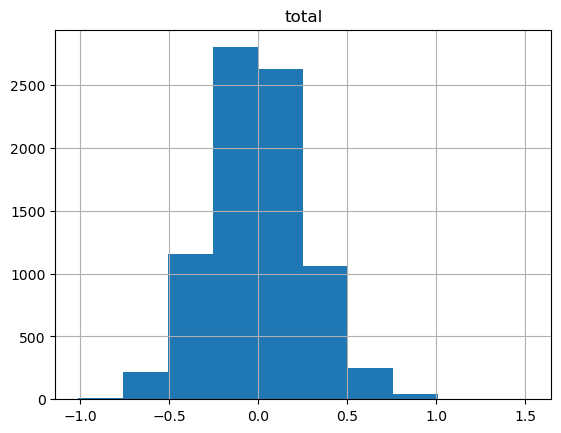

In [42]:
RAPM_ALL_SEASON_OVER_SEASON.hist(column='total', grid=True)

In [31]:
RAPM_ALL = PBP_to_RAPM(NHL_PBP_2013_2022_DF, 2013)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [33]:
RAPM_ALL['Season'] = 'All'
RAPM_ALL.head(20)

,player_id,offense_x,coef_x,player_name,offense_y,coef_y,total,Season
47,8470638.0,offense,0.446462,PATRICE BERGERON,defense,-0.673819,1.120281,All
0,8478402.0,offense,1.034223,CONNOR MCDAVID,defense,-0.041842,1.076065,All
1,8477409.0,offense,0.922857,CARTER VERHAEGHE,defense,0.022952,0.899905,All
7,8479314.0,offense,0.671077,MATTHEW TKACHUK,defense,-0.157625,0.828702,All
100,8480835.0,offense,0.373324,JACK DRURY,defense,-0.437655,0.810978,All
2,8480830.0,offense,0.779507,ANDREI SVECHNIKOV,defense,0.021758,0.757749,All
23,8475913.0,offense,0.506395,MARK STONE,defense,-0.237478,0.743873,All
17,8477933.0,offense,0.548610,SAM REINHART,defense,-0.191551,0.740161,All
13,8478233.0,offense,0.598642,ANDREW MANGIAPANE,defense,-0.136100,0.734742,All
10,8475848.0,offense,0.649840,BRENDAN GALLAGHER,defense,-0.076125,0.725966,All


In [30]:

RAPM_ALL.to_csv('NHL_RAPM_ALL_SEASONS.csv', index=False)

In [19]:
RAPM_ALL_SEASON_OVER_SEASON = pd.concat([RAPM_2013_2014,RAPM_2014_2015,RAPM_2015_2016,RAPM_2016_2017,RAPM_2017_2018,RAPM_2018_2019,RAPM_2019_2020,RAPM_2020_2021,RAPM_2021_2022,RAPM_2022_2023])
RAPM_ALL_SEASON_OVER_SEASON = RAPM_ALL_SEASON_OVER_SEASON.sort_values(by='total',ascending=False)
RAPM_ALL_SEASON_OVER_SEASON.head(20)

,player_id,offense_x,coef_x,player_name,offense_y,coef_y,total,Season
28,8470638.0,offense,0.469415,PATRICE BERGERON,defense,-1.049825,1.519240,2021
0,8479314.0,offense,1.219636,MATTHEW TKACHUK,defense,-0.222967,1.442604,2022
0,8478402.0,offense,1.129378,CONNOR MCDAVID,defense,-0.119175,1.248553,2021
2,8475193.0,offense,0.780979,TOMAS TATAR,defense,-0.379501,1.160480,2022
0,8478427.0,offense,1.134566,SEBASTIAN AHO,defense,-0.016683,1.151249,2018
0,8478402.0,offense,0.772121,CONNOR MCDAVID,defense,-0.355740,1.127861,2020
3,8478402.0,offense,0.773651,CONNOR MCDAVID,defense,-0.301968,1.075619,2022
13,8478975.0,offense,0.590050,MASON MARCHMENT,defense,-0.472130,1.062180,2021
0,8476461.0,offense,0.912531,SEAN COUTURIER,defense,-0.112573,1.025104,2017
1,8473533.0,offense,0.897513,JORDAN STAAL,defense,-0.109300,1.006814,2018
